In [39]:
import itertools
import string

import numpy as np

!pip install nltk matplotlib

!pip install umap-learn

import umap
import nltk

from nltk.tokenize import WordPunctTokenizer

from matplotlib import pyplot as plt
from IPython.display import clear_output

In [5]:
# download the data
!wget 'https://www.dropbox.com/s/obaitrix9jyu84r/quora.txt?dl=1' -O ./quora.txt -nc


--2024-11-08 12:32:50--  https://www.dropbox.com/s/obaitrix9jyu84r/quora.txt?dl=1
Распознаётся www.dropbox.com (www.dropbox.com)… 2620:100:6020:18::a27d:4012, 162.125.70.18
Подключение к www.dropbox.com (www.dropbox.com)|2620:100:6020:18::a27d:4012|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 302 Found
Адрес: https://www.dropbox.com/scl/fi/p0t2dw6oqs6oxpd6zz534/quora.txt?rlkey=bjupppwua4zmd4elz8octecy9&dl=1 [переход]
--2024-11-08 12:32:50--  https://www.dropbox.com/scl/fi/p0t2dw6oqs6oxpd6zz534/quora.txt?rlkey=bjupppwua4zmd4elz8octecy9&dl=1
Повторное использование соединения с [www.dropbox.com]:443.
HTTP-запрос отправлен. Ожидание ответа… 302 Found
Адрес: https://uc442249c68d0cef0b1e89e15c0e.dl.dropboxusercontent.com/cd/0/inline/Cd-O3QfuQbbOZ6LKvWrh76adikwyZxcSUKe1NBjriHG8PYqUcndi4a7rUrOPcvwal0VzcpApL2yL0cWthHK8pVWHIHQLSrNTgPTPox5ZQ9B8cmxBXgxcxzcce24TGHZx-I4/file?dl=1# [переход]
--2024-11-08 12:32:51--  https://uc442249c68d0cef0b1e89e15c0e.dl.dropboxuserconten

In [4]:
data = list(open('./quora.txt', encoding = 'utf-8'))
data[50]

"What TV shows or books help you read people's body language?\n"

### Шаг 1 - токенизация
 Токенизация — это процесс разбиения текста на отдельные слова, фразы или другие значимые элементы, называемые токенами. Она необходима для предварительной обработки текста, чтобы его можно было анализировать или использовать в моделях машинного обучения.


NLTK (Natural Language Toolkit) — одна из самых популярных библиотек для обработки естественного языка на Python. Она предоставляет мощные инструменты для токенизации, лемматизации, анализа синтаксиса, обработки корпуса текстов и других NLP-задач.



In [5]:
tokenizer = WordPunctTokenizer()
print (tokenizer.tokenize(data[50]))

['What', 'TV', 'shows', 'or', 'books', 'help', 'you', 'read', 'people', "'", 's', 'body', 'language', '?']


In [6]:
# Task: lowercase everything and extract tokens with tokenizer

# data_tok should be a list of lists of tokens for each line in data
data_tok = [tokenizer.tokenize(line.lower()) for line in data]

In [7]:
' '.join(data_tok[0])

"can i get back with my ex even though she is pregnant with another guy ' s baby ?"

In [8]:
#Smell check that everything is right
assert all(
    isinstance(row, (list,tuple)) for row in data_tok
), 'please convert each line into a list of tokens (strings)'

assert all(
    all(isinstance(tok,str) for tok in row) for row in data_tok
), 'please convert each line into a list of tokens (strings)'
is_latin = lambda tok: all('a' <= x.lower() <= 'z' for x in tok)

assert all(
    map(lambda l: not is_latin(l) or l.islower(), map(' '.join, data_tok))
), 'please make sure to lowercase the data'

Let's start someplace small: gensim is another NLP library that features many vector-based models including word2vec

In [9]:
!pip install gensim


import gensim


from gensim.models import Word2Vec

  Using cached smart_open-7.0.5-py3-none-any.whl.metadata (24 kB)
  Using cached wrapt-1.16.0-cp310-cp310-macosx_11_0_arm64.whl.metadata (6.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 860.6 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.3/30.3 MB 804.7 kB/s eta 0:00:0000:0100:02
Using cached smart_open-7.0.5-py3-none-any.whl (61 kB)
Using cached wrapt-1.16.0-cp310-cp310-macosx_11_0_arm64.whl (38 kB)


In [10]:
model = Word2Vec(
    data_tok,
    vector_size=32, #embedding vector size
    min_count=5, #consider words that occured at least 5 times
    window=5, #define context as a 5-word window around the target word
).wv

In [11]:
#now you can get a word vector
model.get_vector('anything')

array([-1.7620155 , -0.9924607 ,  1.0988033 ,  1.5464534 ,  2.4444036 ,
        2.8951626 ,  2.0478537 , -3.957726  , -1.0204557 ,  2.0444562 ,
        0.08690772,  2.2127366 ,  2.564504  ,  0.66858715,  1.6604575 ,
       -1.2534924 ,  0.73878425, -1.5387168 ,  0.6036317 , -3.0599954 ,
       -3.717505  , -0.30567893, -1.5479884 , -3.1783957 ,  0.63374466,
       -3.5176013 ,  0.18466234,  1.9696167 ,  1.364401  ,  0.95851874,
        0.26800665, -1.0976148 ], dtype=float32)

In [12]:
# or query similar words directly
model.most_similar('bread')

[('rice', 0.9542040228843689),
 ('cheese', 0.935915470123291),
 ('sauce', 0.9314913153648376),
 ('butter', 0.9312466979026794),
 ('beans', 0.9197058081626892),
 ('chocolate', 0.9131671190261841),
 ('corn', 0.9126002192497253),
 ('banana', 0.9084239602088928),
 ('wine', 0.9027785658836365),
 ('vodka', 0.9006756544113159)]

# Using pre-trained model

In [13]:
import gensim.downloader as api

model = api.load('glove-twitter-25')

[==================================================] 100.0% 104.8/104.8MB downloaded


In [14]:
len(model.key_to_index.keys())

1193514

In [15]:
model.sort_by_descending_frequency()

In [16]:
model.most_similar(positive=['coder','money'], negative=['brain'])

[('realtor', 0.8265186548233032),
 ('gfx', 0.8249695897102356),
 ('caterers', 0.7982025146484375),
 ('beatmaker', 0.7936854362487793),
 ('recruiter', 0.7892401218414307),
 ('sfi', 0.784467339515686),
 ('sosh', 0.7840632200241089),
 ('promoter', 0.7838250994682312),
 ('smallbusiness', 0.7786215543746948),
 ('promoters', 0.77646803855896)]

# Visualizing word vector

In [17]:
words = list(model.key_to_index.keys())[
                                    :1000] # for each word^ compute it's vector with model
print(words[::101])

['<user>', 'mi', 'much', '✔', 'kita', 'buat', 'looking', "y'", 'kak', 'gusta']


In [18]:
word_vectors = np.asarray([model[x] for x in words])

In [19]:
assert isinstance(word_vectors, np.ndarray)
assert word_vectors.shape == (len(words),25)
assert np.isfinite(word_vectors).all()

In [20]:
word_vectors.shape

(1000, 25)

# Linear projection:PCA
Выбирается направление наибольшей дисперсии в данных

In [23]:
!pip install scikit-learn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 939.6 kB/s eta 0:00:0000:0100:01
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


In [24]:
pca = PCA(2)
scaler = StandardScaler()
word_vectors_pca = scaler.fit_transform(word_vectors)
word_vectors_pca = pca.fit_transform(word_vectors_pca)


In [25]:
assert word_vectors_pca.shape == (
    len(word_vectors),2,
), 'there must be a 2d vector for each word'

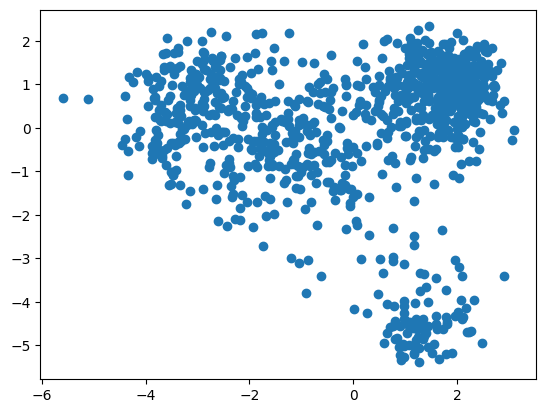

In [26]:
plt.scatter(word_vectors_pca[:,0], word_vectors_pca[:,1])

Not so informative!
Let's make it more beautiful with bokeh! The plot is now interactive

In [27]:
!pip install bokeh
import bokeh.models as bm, bokeh.plotting as pl
from bokeh.io import output_notebook

  Using cached jinja2-3.1.4-py3-none-any.whl.metadata (2.6 kB)
  Using cached xyzservices-2024.9.0-py3-none-any.whl.metadata (4.1 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 821.2 kB/s eta 0:00:00a 0:00:01
Using cached jinja2-3.1.4-py3-none-any.whl (133 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 706.6 kB/s eta 0:00:00a 0:00:01
Using cached xyzservices-2024.9.0-py3-none-any.whl (85 kB)
Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
Using cached tzdata-2024.2-py2.py3-none-any.whl (346 kB)


In [29]:
output_notebook()

def draw_vectors(
        x,
        y,
        radius = 10,
        alpha = 0.25,
        color = 'blue',
        width = 600,
        height = 400,
        show = True,
        **kwargs
):
    'draws an interactive plot for data points with auxilirary info on hover'
    if isinstance(color, str):
        color = [color] * len(x)
    data_source = bm.ColumnDataSource({'x':x, 'y':y, 'color':color, **kwargs})

    fig = pl.figure(active_scroll = 'wheel_zoom', width = width, height = height)
    fig.scatter('x','y', size = radius, color = 'color', alpha = alpha, source = data_source)

    fig.add_tools(bm.HoverTool(tooltips=[(key, '@' + key) for key in kwargs.keys()]))
    if show:
        pl.show(fig)
    return fig

Loading BokehJS ...

In [30]:
draw_vectors(word_vectors_pca[:,0], word_vectors_pca[:,1], token = words)

figure(id='p1004', ...)

# Visualizing neighbors with UMAP
Те эмбединги, которые векторно находились рядом при переносе на плоскость проекции также находятся близко

In [43]:
!pip cache purge



Files removed: 2192


In [44]:
!pip install umap-learn


In [47]:
import umap.umap_ as umap
print(umap.UMAP)


/Users/vera/miniconda3/envs/my_env_py310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<class 'umap.umap_.UMAP'>


In [48]:

embedding = umap.UMAP(n_neighbors=5).fit_transform(word_vectors)


In [49]:
draw_vectors(embedding[:,0], embedding[:,1], token = words)

figure(id='p1055', ...)

# Visualizing phrases
The simple way is to take an average of vectors for all tokens in the phrase

In [50]:
def get_phrase_embedding(phrase):
    #1. lowercase phrase
    #2. tokenize phrase
    #3. average word vectors for all words in tokenized phrase
    #skip words that are not in model's vocabulary
    #if all words are missing from vocabulary, return zero

    vector = np.zeros([model.vector_size], dtype='float32')
    phrase_tokenized = tokenizer.tokenize(phrase.lower())
    phrase_vectors = [model[x] for x in phrase_tokenized if model.has_index_for(x)]
    if len(phrase_vectors) != 0:
        vector = np.mean(phrase_vectors,axis = 0)
    return vector

In [51]:
get_phrase_embedding(data[402687])

array([-0.18204999,  0.30953574,  0.20861094,  0.07982156, -0.22565515,
       -0.33001748,  1.2495784 ,  0.13134292, -0.33788875,  0.06196944,
       -0.231793  ,  0.09389219, -4.9685497 , -0.23611419, -0.32609668,
       -0.092073  ,  0.4407505 , -0.75413746, -0.5389092 , -0.184752  ,
        0.07867809,  0.20018655, -0.16202375,  0.30375698, -0.41255665],
      dtype=float32)

In [52]:
vector = get_phrase_embedding("I'm very sure. This never happened to me before...")

In [53]:
#let's consider ~5k phrases for a first run
chosen_phrases = data[::len(data) // 1000]

#compute vectors for chosen phrases and turn them to numpy array
phrase_vectors = np.asarray([get_phrase_embedding(x) for x in chosen_phrases])

In [54]:
assert isinstance(phrase_vectors, np.ndarray) and np.isfinite(phrase_vectors).all()
assert phrase_vectors.shape == (len(chosen_phrases), model.vector_size)

In [55]:
phrase_vectors_2d = umap.UMAP(n_neighbors=3).fit_transform(phrase_vectors)

In [56]:
draw_vectors(
    phrase_vectors_2d[:,0],
    phrase_vectors_2d[:,1],
    phrase=[phrase[:50] for phrase in chosen_phrases],
    radius=20,
)

figure(id='p1106', ...)

Let's build a simple "similar question" engine with phrase embwddings we've built

In [57]:
# computer vector embedding for all lines in data
data_vectors = np.vstack([get_phrase_embedding(l) for l in data])

In [58]:
norms = np.linalg.norm(data_vectors, axis=1)

In [59]:
printable_set = set(string.printable)

In [60]:
data_subset = [x for x in data if set(x).issubset(printable_set)]

In [61]:
def find_nearest(query,k=10):
    query_vector = get_phrase_embedding(query)
    dists = data_vectors.dot(query_vector[:,None])[:,0] / (
        (norms + 1e-16) * np.linalg.norm(query_vector)
    )
    nearest_elements = dists.argsort(axis=0)[-k:][::-1]
    out = [data[i] for i in nearest_elements]
    return out

In [65]:
results = find_nearest(query='How do I enter the matrix?', k=10)
print(' '.join(results))

assert len(results) == 10 and isinstance(results[0], str)
#assert results[0] == 'How do I get to dark web?\n'

How do I get to the dark web?
 What universal remote do I need and how do I set it up to a Blaupunkt TV?
 How do I connect the ASUS_T00Q to my PC?
 How do you print the gridlines in Excel 2007?
 How do you print the gridlines in Excel 2010?
 How do you print the gridlines in Excel 2003?
 I would like to create a new website. What do I have to do?
 How do I get the new Neko Atsume wallpapers? How do they work?
 I want to experience the 4G network. Do I need to change my SIM card from 3G to 4G?
 What do I have to do to sell my photography?



In [66]:
find_nearest(query='How does Twitter work',k=10)

['Why am I not getting any answers to my questions on Quora lately?\n',
 'How can I write essays if I have no personal opinions on anything?\n',
 'Why do people post really LONG answers on Quora? Is it really required?\n',
 'Why does Quora limit questions to 150 characters? I find it really annoying, some questions need more context.\n',
 'Why do I always get a notification from Quora that my questions "need improvement"?\n',
 'My questions on Quora are not getting answered. What should I do?\n',
 'How do I get people answer my question in Quora?\n',
 'How do I know that my business idea is new or someone already implemented?\n',
 'How do you know that advertising works?\n',
 'Why do people re-ask questions on Quora that have already been answered multiple times?\n']

Let's cluster our phrases

In [67]:
from sklearn.cluster import DBSCAN, KMeans

In [68]:
kmeans = KMeans(3)

In [69]:
labels = kmeans.fit_predict(np.asarray(phrase_vectors))

In [70]:
_colors = ['red', 'green', 'blue']

In [71]:
draw_vectors(
    phrase_vectors_2d[:,0],
    phrase_vectors_2d[:,1],
    color = [_colors[l] for l in labels],
    phrase = [phrase[:50] for phrase in chosen_phrases],
    radius=20,
)

figure(id='p1157', ...)

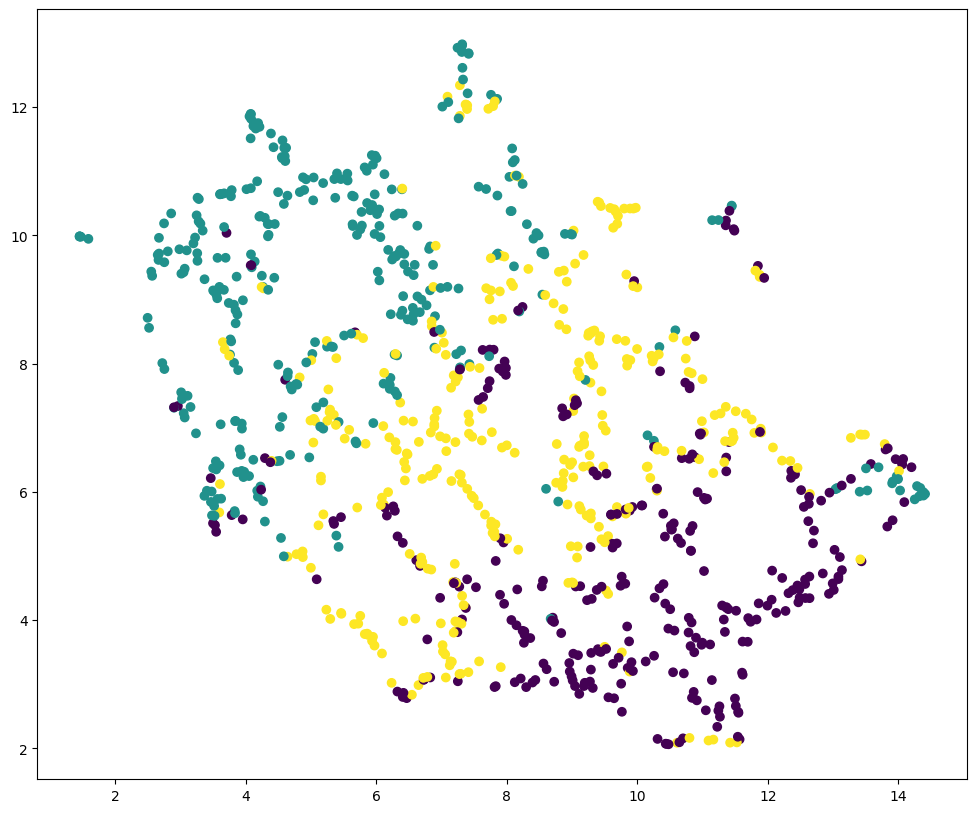

In [73]:
plt.figure(figsize=(12,10))
plt.scatter(phrase_vectors_2d[:,0], phrase_vectors_2d[:,1], c=labels.astype(float))